In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def etaPrediction(newTick, oldTick, oldEta, beta=1, linParams=0):
    result = (oldEta + linParams) * (oldTick / newTick)**(1 - beta/2) - linParams
    return result

In [50]:
product = 'CAD/USD (6C)'
currentTick = 0.5
etaMean = 0.40
etaStD = 0.03

In [51]:
x = np.arange(0.05, 1.0, 0.005)
y = etaPrediction(x, currentTick, etaMean)
ySupLim = etaPrediction(x, currentTick, etaMean + etaStD)
yInfLim = etaPrediction(x, currentTick, etaMean - etaStD)

0.36999999999999983


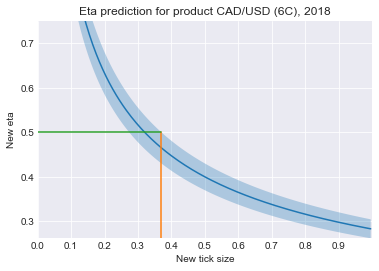

In [52]:
ttl = 'Eta prediction for product {}, 2018'
plt.title(ttl.format(product))
plt.xlabel('New tick size')
plt.xlim((0.0, currentTick*2))
plt.ylim((min(yInfLim), .75)) #Eta of .75 is high alreday 
plt.xticks(np.arange(0.0, currentTick*2, 0.1))
plt.ylabel('New eta')
plt.plot(x, y)
plt.fill_between(x, yInfLim, ySupLim, alpha=0.3)

check1, check2, check3 = 0, 0, 0
for val in x:
    eval = etaPrediction(val, currentTick, etaMean)
    eval_p = etaPrediction(val, currentTick, etaMean + etaStD)
    eval_m = etaPrediction(val, currentTick, etaMean - etaStD)

    if eval_p <= 0.5 and check3 == 0:
        plt.plot([val, val], [0.0, 0.5])
        plt.plot([0.0, val], [0.5, 0.5])
        print(val)
        check3 = 1

    '''
    if eval <= 0.5 and check2 == 0:
        plt.plot([val, val], [0.17, 0.5])
        check2 = 1

    if eval_m <= 0.5 and check1 == 0:
        plt.plot([val, val], [0.17, 0.5])
        check1 = 1
    '''
